# Logistic Regression Implementation

An example binary classification problem can be represented by a dataset containing information about customers who did or did not default on their credit cards.  We want to do the following:

- Basic EDA: explore default groups for each individual feature (boxplots could be a nice way in here)
- Process categorical variables using `pd.get_dummies`
- Split your data
- Run a `LogisticRegression` to explore the likelihood of default based on the `balance` column.
- Cross validate this using values $[0.1, 1, 5, 10, 100]$ for the `C` parameter.
- Incorporate `PolynomialFeatures` into your model and rerun.  How did the performance change?
- Repeat for the `student` column.

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style='ticks')

In [18]:
df = pd.read_csv('data/default.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


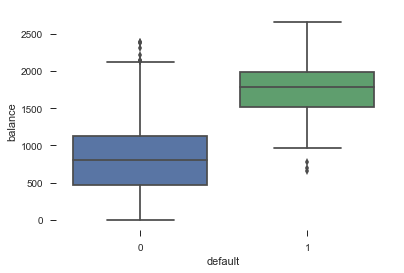

In [55]:
sns.boxplot(x='default', y='balance',data=df)
sns.despine(left=True, bottom=True)

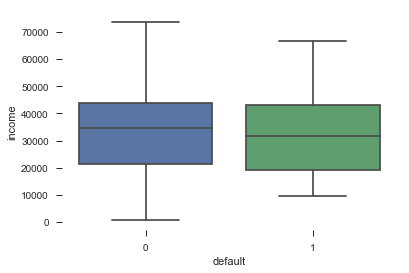

In [56]:
sns.boxplot(x='default', y='income',data=df)
sns.despine(left=True, bottom=True)

In [22]:
df.default = df.default.apply(lambda x: 0 if x=='No' else 1)
df.student = df.student.apply(lambda x: 0 if x=='No' else 1)

In [23]:
df.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [24]:
df.student.value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [37]:
X = df[['balance']]
y = df.default

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [38]:
pipe = make_pipeline(PolynomialFeatures(),LogisticRegression())

In [39]:
params = {'logisticregression__C': [0.1,1,5,10,100]}

In [40]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [41]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [43]:
best = grid.best_estimator_

In [44]:
y_pred = best.predict(X_test)

In [47]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2459
          1       0.38      0.66      0.48        41

avg / total       0.98      0.98      0.98      2500



### add in polynomial features

In [48]:
params = {'polynomialfeatures__degree': range(1,5),
          'logisticregression__C': [0.1,1,5,10,100]}

In [49]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': range(1, 5), 'logisticregression__C': [0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [52]:
best = grid.best_estimator_

In [53]:
y_pred = best.predict(X_test)

In [54]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      2471
          1       0.32      0.79      0.46        29

avg / total       0.99      0.98      0.98      2500

